In [1]:
#1.import packages
import csv
import numpy as np
import pickle
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix, classification_report, f1_score
from itertools import chain

from keras.utils.data_utils import get_file
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding,Dense, Dropout, Activation,Flatten
from keras.layers import LSTM,SimpleRNN
from keras.datasets import imdb


Using TensorFlow backend.


In [2]:
# Get full dataset from the webside
path = get_file('imdb_full.pkl',
                origin='https://s3.amazonaws.com/text-datasets/imdb_full.pkl')

# Split into train/test, and separate features from labels
f = open(path, 'rb')
(x_train, labels_train), (x_test, labels_test) = pickle.load(f)



# Using the Index/word mapping in keras.datasets to get the csv of the train and test dataset

#train dataset
idx = imdb.get_word_index()
idx2word = {v: k for k, v in idx.items()}
with open('train.csv', 'w', encoding='utf-8') as f:
    writer = csv.writer(f)
    
    for i in range(0, len(x_train)):
        label = labels_train[i]
        review = ' '.join([idx2word[o] for o in x_train[i]])
        writer.writerow([review, label])

#test dataset
with open('test.csv', 'w', encoding='utf-8') as f:
    writer = csv.writer(f)
    
    for i in range(0, len(x_test)):
        label = labels_test[i]
        review = ' '.join([idx2word[o] for o in x_test[i]])
        writer.writerow([review, label])

In [3]:
#ouput the train dataset
train_data = pd.read_csv('train.csv', header=None)
print(train_data.shape)
train_data

(25000, 2)


,0,1
0,bromwell high is a cartoon comedy it ran at th...,1
1,homelessness or houselessness as george carlin...,1
2,brilliant over acting by lesley ann warren bes...,1
3,this is easily the most underrated film inn th...,1
4,this is not the typical mel brooks film it was...,1
...,...,...
24995,towards the end of the movie i felt it was too...,0
24996,this is the kind of movie that my enemies cont...,0
24997,i saw 'descent' last night at the stockholm fi...,0
24998,some films that you pick up for a pound turn o...,0


In [4]:
#ouput the train dataset
test_data = pd.read_csv('test.csv', header=None)
print(test_data.shape)
test_data

(25000, 2)


,0,1
0,i went and saw this movie last night after bei...,1
1,actor turned director bill paxton follows up h...,1
2,as a recreational golfer with some knowledge o...,1
3,i saw this film in a sneak preview and it is d...,1
4,bill paxton has taken the true story of the 19...,1
...,...,...
24995,i occasionally let my kids watch this garbage ...,0
24996,when all we have anymore is pretty much realit...,0
24997,the basic genre is a thriller intercut with an...,0
24998,four things intrigued me as to this film first...,0


### The train and test dataset provide a set of 25,000 highly polar movie reviews with tag 1: positive reviews; tag 0: negative reviews

In [11]:
#load the dataset and save the top 5000 words 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=7000)

# Model1:Multi-Layer Perceptron(MLP)

In [17]:
#Model 3: MLP

#data preprocessing
# Pad sequences: Convert the sequence into a new sequence of the same length with 400.
x_train = sequence.pad_sequences(x_train, maxlen=400)
x_test = sequence.pad_sequences(x_test, maxlen=400)
print('Train data size:', x_train.shape)
print('Test data size:', x_test.shape)

#set parameters 
max_features = 7000
embedding_size = 50
maxlen = 400


batch_size = 64
epochs = 4


print('Build the MLP model...')
model1 = Sequential()
model1.add(Embedding(max_features, 
                    embedding_size, 
                    input_length=maxlen))
model1.add(Dropout(0.35))

model1.add(Flatten())

model1.add(Dense(units=256, activation='relu'))
model1.add(Dropout(0.35))

model1.add(Dense(units=1,activation='sigmoid'))
           
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



model1.summary()

Train data size: (25000, 400)
Test data size: (25000, 400)
Build the MLP model...
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 400, 50)           350000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               5120256   
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 5,470,513
Trainable para

In [18]:
hist1=model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 66s 3ms/step - loss: 0.4372 - accuracy: 0.7749 - val_loss: 0.2980 - val_accuracy: 0.8747
Epoch 2/4
25000/25000 [==============================] - 69s 3ms/step - loss: 0.1542 - accuracy: 0.9426 - val_loss: 0.3208 - val_accuracy: 0.8705
Epoch 3/4
25000/25000 [==============================] - 65s 3ms/step - loss: 0.0573 - accuracy: 0.9796 - val_loss: 0.4512 - val_accuracy: 0.8606
Epoch 4/4
25000/25000 [==============================] - 63s 3ms/step - loss: 0.0329 - accuracy: 0.9876 - val_loss: 0.5279 - val_accuracy: 0.8572


25000/25000 [==============================] - 7s 270us/step
Test accuracy: 0.857200026512146
Test score (loss): 0.5279454268455506

F1 Score (Macro): 0.8570740962283454
F1 Score (Micro): 0.8572


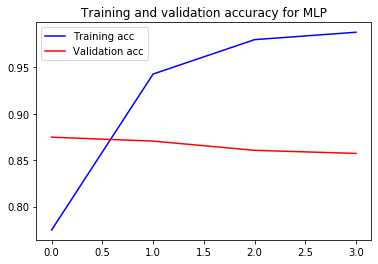

<Figure size 432x288 with 0 Axes>

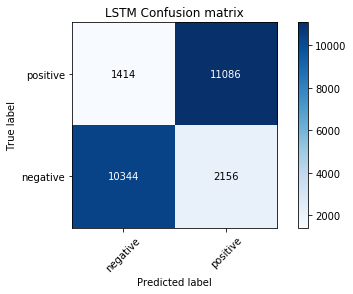

In [29]:
# Evaluate MLP model

acc=hist1.history['accuracy']
val_acc=hist1.history['val_accuracy']
loss=hist1.history['loss']
val_loss=hist1.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title("Training and validation accuracy for MLP")
plt.legend()
plt.figure()

score, acc = model1.evaluate(x_test, y_test, batch_size=batch_size)
preds = model1.predict_classes(x_test, batch_size=batch_size)

# Confusion Matrix
cm = confusion_matrix(y_test, preds)
def plot_confusion_matrix(cm, classes, normalize=False, title='LSTM Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.ylim(-0.5,1.5)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],verticalalignment='center', horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#F1-Score
f1_macro = f1_score(y_test, preds, average='macro') 
f1_micro = f1_score(y_test, preds, average='micro')

print('Test accuracy:', acc)
print('Test score (loss):', score)
print('')
print('F1 Score (Macro):', f1_macro)
print('F1 Score (Micro):', f1_micro)

plot_confusion_matrix(cm, {'negative': 0, 'positive': 1})



# Model2: Recurrent  Neural Network(RNN)

In [20]:
#Model 2: RNN

#data preprocessing
# Pad sequences: Convert the sequence into a new sequence of the same length with 400.
x_train = sequence.pad_sequences(x_train, maxlen=400)
x_test = sequence.pad_sequences(x_test, maxlen=400)
print('Train data size:', x_train.shape)
print('Test data size:', x_test.shape)

#set parameters 
max_features = 7000
embedding_size = 50
maxlen = 400

batch_size = 64
epochs = 4



print('Build the RNN model...')
model2 = Sequential()

# Embedding layer
model2.add(Embedding(max_features, 
                    embedding_size, 
                    input_length=maxlen))
model2.add(Dropout(0.35))

model2.add(SimpleRNN(units=16))

model2.add(Dense(units=256,activation='relu'))
model2.add(Dropout(0.35))
model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.summary()

Train data size: (25000, 400)
Test data size: (25000, 400)
Build the RNN model...
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 400, 50)           350000    
_________________________________________________________________
dropout_11 (Dropout)         (None, 400, 50)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                1072      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               4352      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 355,681
Trainable params

In [21]:
hist2=model2.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(x_test, y_test),
         verbose=1)

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 109s 4ms/step - loss: 0.6381 - accuracy: 0.6053 - val_loss: 0.4441 - val_accuracy: 0.8001
Epoch 2/4
25000/25000 [==============================] - 107s 4ms/step - loss: 0.3738 - accuracy: 0.8371 - val_loss: 0.4143 - val_accuracy: 0.8255
Epoch 3/4
25000/25000 [==============================] - 112s 4ms/step - loss: 0.2379 - accuracy: 0.9072 - val_loss: 0.3996 - val_accuracy: 0.8400
Epoch 4/4
25000/25000 [==============================] - 114s 5ms/step - loss: 0.1518 - accuracy: 0.9446 - val_loss: 0.4726 - val_accuracy: 0.8434


25000/25000 [==============================] - 17s 694us/step
Test accuracy: 0.8434399962425232
Test score (loss): 0.4725688356590271

F1 Score (Macro): 0.8434398787598422
F1 Score (Micro): 0.8434400000000001


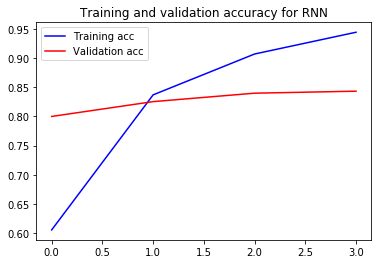

<Figure size 432x288 with 0 Axes>

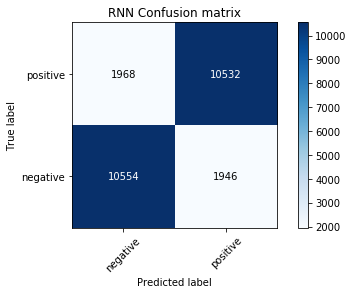

In [28]:
# Evaluate RNN model
acc=hist2.history['accuracy']
val_acc=hist2.history['val_accuracy']
loss=hist2.history['loss']
val_loss=hist2.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title("Training and validation accuracy for RNN")
plt.legend()
plt.figure()

score, acc = model2.evaluate(x_test, y_test, batch_size=batch_size)
preds = model2.predict_classes(x_test, batch_size=batch_size)

# Confusion Matrix
cm = confusion_matrix(y_test, preds)

#F1-Score
f1_macro = f1_score(y_test, preds, average='macro') 
f1_micro = f1_score(y_test, preds, average='micro')


print('Test accuracy:', acc)
print('Test score (loss):', score)
print('')
print('F1 Score (Macro):', f1_macro)
print('F1 Score (Micro):', f1_micro)

plot_confusion_matrix(cm, {'negative': 0, 'positive': 1})

# Model3:Long Short-Term Memory(LSTM)

In [23]:
#Model 3: LSTM

#data preprocessing
# Pad sequences: Convert the sequence into a new sequence of the same length with 400.
x_train = sequence.pad_sequences(x_train, maxlen=400)
x_test = sequence.pad_sequences(x_test, maxlen=400)
print('Train data size:', x_train.shape)
print('Test data size:', x_test.shape)

#set parameters 
max_features = 7000
embedding_size = 50
maxlen = 400

batch_size = 64
epochs = 4


print('Build the LSTM model...')
model3 = Sequential()
model3.add(Embedding(max_features, 
                    embedding_size, 
                    input_length=maxlen))
model3.add(Dropout(0.35))

model3.add(LSTM(32))

model3.add(Dense(units=256, activation='relu'))
model3.add(Dropout(0.35))

model3.add(Dense(units=1,activation='sigmoid'))
           
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model3.summary()

Train data size: (25000, 400)
Test data size: (25000, 400)
Build the LSTM model...
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 400, 50)           350000    
_________________________________________________________________
dropout_13 (Dropout)         (None, 400, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 369,329
Trainable param

In [24]:
#train model
hist3=model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 193s 8ms/step - loss: 0.4045 - accuracy: 0.8090 - val_loss: 0.3713 - val_accuracy: 0.8514
Epoch 2/4
25000/25000 [==============================] - 186s 7ms/step - loss: 0.2432 - accuracy: 0.9032 - val_loss: 0.3238 - val_accuracy: 0.8680
Epoch 3/4
25000/25000 [==============================] - 185s 7ms/step - loss: 0.1932 - accuracy: 0.9280 - val_loss: 0.3363 - val_accuracy: 0.8772
Epoch 4/4
25000/25000 [==============================] - 187s 7ms/step - loss: 0.1548 - accuracy: 0.9416 - val_loss: 0.3379 - val_accuracy: 0.8696


25000/25000 [==============================] - 41s 2ms/step
Test accuracy: 0.8695600032806396
Test score (loss): 0.33790928402900694

F1 Score (Macro): 0.8693888419139978
F1 Score (Micro): 0.86956

The LSTM confusion matrix is:


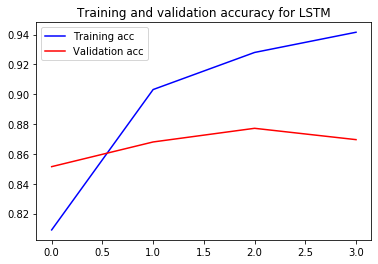

<Figure size 432x288 with 0 Axes>

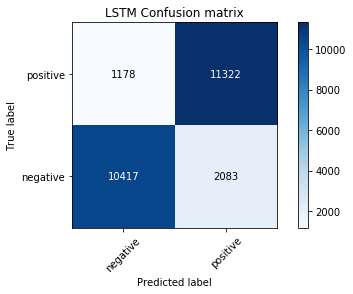

In [30]:
# Evaluate LSTM model
acc=hist3.history['accuracy']
val_acc=hist3.history['val_accuracy']
loss=hist3.history['loss']
val_loss=hist3.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title("Training and validation accuracy for LSTM")
plt.legend()
plt.figure()

score, acc = model3.evaluate(x_test, y_test, batch_size=batch_size)
preds = model3.predict_classes(x_test, batch_size=batch_size)

# Confusion Matrix
cm = confusion_matrix(y_test, preds)

#F1-Score
f1_macro = f1_score(y_test, preds, average='macro') 
f1_micro = f1_score(y_test, preds, average='micro')


print('Test accuracy:', acc)
print('Test score (loss):', score)
print('')
print('F1 Score (Macro):', f1_macro)
print('F1 Score (Micro):', f1_micro)
print('')
print('The LSTM confusion matrix is:')
plot_confusion_matrix(cm, {'negative': 0, 'positive': 1})

In [31]:
# Save the model weights
model1.save('MLP_model.h5')
model1.save_weights('MLP_weights.h5')

model2.save('RNN_model.h5')
model2.save_weights('RNN_weights.h5')

model3.save('LSTM_model.h5')
model3.save_weights('LSTM_weights.h5')